# 최적화 알고리즘

최적화 알고리즘은 비용 함수와 같은 목적 함수를 최대화 혹은 최소화하기 위해서 가중치, 편향과 같은 매개변수를 수정하는 알고리즘이다.

## SGD, Stochastic Gradient Descent

SGD(확률적 경사 하강법)는 학습률이 일정한 가장 기본적인 최적화 알고리즘이다.  
  
$w_i = w_{i-1} - \eta \frac{\partial E}{\partial w}$

여기서, $w_i$는 i번째로 수정할 w의 값, $\eta$는 학습률이다.

학습률이 일정하여 간단하게 구현할 수 있는 장점이 있지만, 학습률을 변경할 수 없는다는 단점도 있다.

## Momentum

Momentum은 SGD에 관성($v_i$)을 더한 최적화 알고리즘이다.

$v_1 = 0\\
v_i = \beta(-\eta \frac{\partial E}{\partial w_{i-2}} + v_{i-1}) \quad i \ge 2\\
w_i = w_{i-1} -\eta \frac{\partial E}{\partial w_{i-1}} + v_i,\quad i \ge 1$


위 $v_i$에 대한 식은 점화식이고, 방정식으로 나타나면 $v_i = \overset{i-2}{\underset{k=0}{\Sigma}}(-\beta^{i-1-k} \eta \frac{\partial E}{\partial w_k})\quad i \ge 2$ 이다.

여기서, $v_i$는 i번째로 w를 수정할 때의 관성, $\beta$는 관성 계수이다.  
  
$v_1$는 관성이 전혀 없는 상태이고, $v_2$부터 관성이 생긴다.  
$\beta$는 $v_i$의 각 항들이 발산하지 않고 0으로 수렴하기 위해 0과 1 사이의 값($\beta \in (0, 1)$)이어야 한다.

Momentum을 사용하면 수정량이 급격하게 변화하는 것을 막고 조금 더 부드럽게 수정된다. 대신 SGD와 달리 설정해야 하는 상수가 $\eta$, $\beta$ 2개로 늘어나 조정이 조금 더 어려워진다.

## AdaGrad, Adaptive Gradient

$h_0 = 0\\
h_i = h_{i-1} + (\frac{\partial E}{\partial w_{i-1}})^2, \quad i \ge 1\\
w_i = w_{i-1} - \eta \frac{1}{\sqrt h_i} \frac{\partial E}{\partial w_{i-1}}, \quad i \ge 1$


여기서, $h_i$는 학습률을 조정하는 변수(0번째부터 i-1번째까지 누적된 기울기 제곱의 합)이다.

$\frac{\partial E}{\partial w_{i-1}}$에 제곱을 취하는 이유는 기울기의 부호를 무시하고 기울기의 크기를 얻어내기 위함이다. 표준편차와 비슷하게 $h_i$는 $(\frac{\partial E}{\partial w_{i-1}})^2$들을 더한 값이므로 학습률($\eta \frac{1}{\sqrt h_i}$)을 계산할 때 $\sqrt h_i$와 같이 $h_i$에 제곱근을 취한다.

$\frac{1}{\sqrt h_i}$는 학습률을 주로 감소시키는 역할을 한다(유지시키는 경우도 있으나 거의 없음).  
  
$h_i$는 i가 증가할 때마다 (감소하지는 않는 )증가하거나 유지하는 값이다. $\frac{\partial E}{\partial w_{i-1}}$가 0인 경우는 거의 없으므로 대체적으로 $h_i$는 i가 증가할 때마다 증가하는 값이다. 따라서, $h_i \in (0, \infin)$이다.  
참고로, $i$가 증가할수록 $h_i$가 $\infin$에 가까워지는데 $h_i$가 $\infin$에 가까워지면 $\frac{1}{\sqrt h_i}$가 0에 가까워진다.

AdaGrad를 사용하면 초기에는 $h_i$가 상대적으로 작아, 학습률($\eta \frac{1}{\sqrt h_i})$이 상대적으로 크므로 넓은 영역에서 탐색한다. 그러다가 시간이 지날수록(i가 증가할수록) $h_i$는 점점 더 커지므로 학습률($\eta \frac{1}{\sqrt h_i})$이 점점 더 작아진다. 그래서 시간이 지날수록 좁은 영역에서 탐색한다.  
넓은 영역에서 탐색하는 것은 모델이 지역 최소점을 벗어나게 해주기 위함이고, 좁은 영역에서 탐색하는 것은 모델이 전역 최소값을 정확하게 찾게 해주기 위함이다.

AdaGrad에서 설정해야 할 상수가 $\eta$ 1개 밖에 없으므로 상수를 조정하는 번거로움이 덜하다. 하지만, 대체적으로 증가만 하는 $h_i$가 급격하게 증가한다면 학습률($\eta \frac{1}{\sqrt h_i})$이 0에 가까워져서 더 이상 최적화가 진행되지 않을 수 있다.


## RMSProp, Root Mean Square Propagation

$h_0 = 0\\
h_i = \rho h_{i-1} + (1-\rho)(\frac{\partial E}{\partial w_{i-1}})^2, \quad i \ge 1\\
w_i = w_{i-1} -\eta \frac{1}{\sqrt h_i} \frac{\partial E}{\partial w_{i-1}}, \quad i \ge 1$

여기서, $h_i$는 학습률을 조정하는 변수인데 AdaGrad와 달리 $h_{i-1}$를 일정한 비율로 잊어버린다. $\rho$는 $h_{i-1}$를 기억하는 비율인데 가중 평균할 최근 데이터 개수($\lfloor\frac{1}{1-\rho}\rfloor$)를 정할 때 사용된다. 일반적으로 $\rho$의 값은 0.9가 추천된다.

RMSProp의 $h_i$의 점화식에 사용된 Exponentially Weighted Averages(지수가중평균, 최근일수록 중요도가 더 높다)은 오래된 데이터가 현재에 미치는 영향을 지수적으로 감쇠하도록 만들어준다.  
앤드류 응 강의에 의하면 RMSProp에서 사용된 Exponentially Weighted Averages은 최근 $\lfloor\frac{1}{1-\rho}\rfloor$ 개의 데이터를 가중 평균하는 것과 근사적으로 같다.

$h_i$는 최근 $\lfloor\frac{1}{1-\rho}\rfloor$개의 데이터를 가중 평균하므로 최근 $\lfloor\frac{1}{1-\rho}\rfloor$개의 데이터의 경향성을 나타낸다고 볼 수 있다. 기울기의 최근 경향($h_i$)이 가파르다면($h_i$가 크다면) 학습률($\eta \frac{1}{\sqrt h_i}$)이 작고, 기울기의 최근 경향이 완만하다면($h_i$가 작다면) 학습률($\eta \frac{1}{\sqrt h_i}$)이 크다.

$\rho$로 $h_{i-1}$를 일정한 비율로 잊어버리기 때문에 학습률($\eta \frac{1}{\sqrt h_i})$이 거의 0에 가까워지는 AdaGrad의 단점을 해결한다.

아래의 코드는 최근 $\lfloor\frac{1}{1-\rho}\rfloor$ 개에서 아쉽게 벗어난 $\lfloor\frac{1}{1-\rho}\rfloor$ + 1 번째부터 $\lfloor\frac{1}{1-\rho}\rfloor$ + 11번째까지의 데이터의 계수들을 $\rho$를 바꿔가며(0.01에서 0.99까지 0.01 단위로) 그려본 그래프이다.

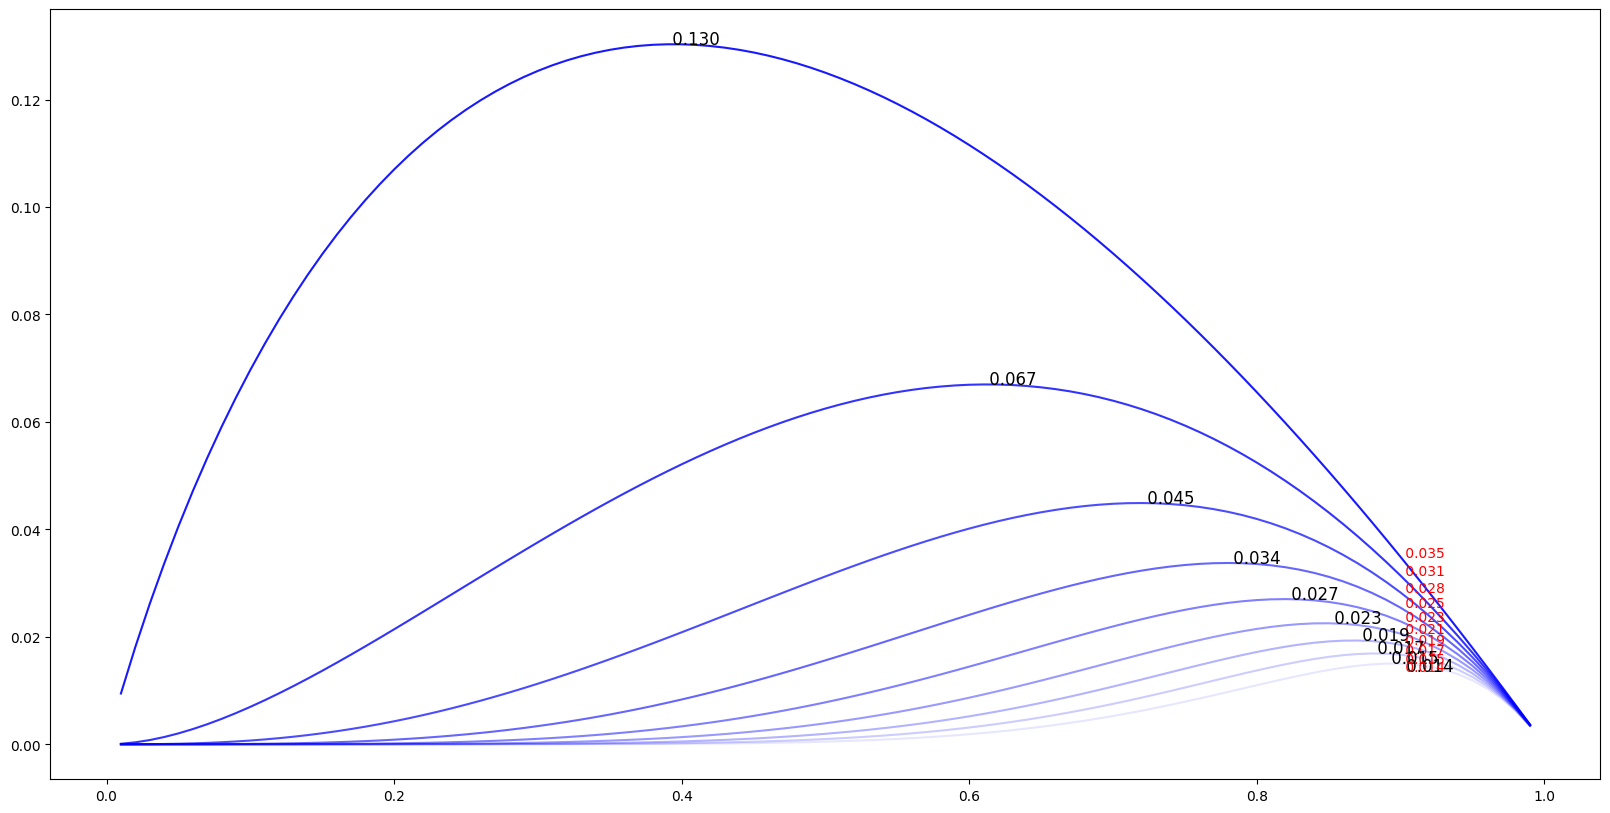

In [16]:
import numpy as np
import matplotlib.pyplot as plt

rho = [0 + 0.01*i for i in range(1, 99+1)]; rho = np.array(rho)
recent_data_count = 1/(1-rho)

plt.figure(figsize=(20,10))
for i in range(10):
    end_data_coefficient = rho**(recent_data_count+i) * (1-rho)
    plt.plot(rho, end_data_coefficient, 'b', alpha=0.9-0.1*i)
    # 데이터의 최대 계수를 텍스트로 삽입
    max_index = np.argmax(end_data_coefficient)
    plt.text(rho[max_index], end_data_coefficient[max_index], f"{end_data_coefficient[max_index]: 0.3f}", {"fontsize": 12})
    # rho가 0.9일 때의 계수를 텍스트로 삽입
    plt.text(rho[89], end_data_coefficient[89], f"{end_data_coefficient[89]: 0.3f}", {"fontsize": 10, "color": "red"})


## Adam, ADAptive Moment Estimation